In [ ]:
# importing required libraries
import os
import cptac
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
os.chdir('/Users/joshuagabbay/Desktop/QBIO/qbio_490_joshuagabbay/qbio490_joshuagabbay/analysis_data_python')


In [3]:
# dataset
# NEED TO INSTALL PROTEIN DATASET into pandas dataframe, filter out NAS
cptac.download(dataset="BRCA")
brca = cptac.Brca()
protein_data = brca.get_proteomics()
protein_data.columns = protein_data.columns.get_level_values(0)
prot_df = protein_data.dropna(axis=1)

In [24]:
#selecting features
genes = ['TP53', 'A2M', 'ZYX']
x = prot_df.loc[:,genes]
protein_data.columns

Index(['A1BG', 'A2M', 'A2ML1', 'AAAS', 'AACS', 'AADAT', 'AAED1', 'AAGAB',
       'AAK1', 'AAMDC',
       ...
       'ZSCAN31', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='Name', length=10107)

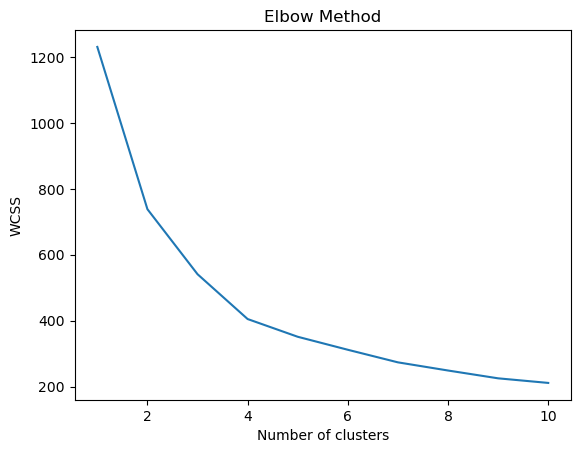

In [25]:
#Elbow Plot
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# creating a KMeans object
kmeans = KMeans(4)
# fitting kmeans object to the dataset
kmeans.fit(x)

KMeans(n_clusters=4)

In [33]:
#lists which cluster each datapoint is in
identified_clusters = kmeans.fit_predict(x)
data_with_clusters

Name,A1BG,A2M,A2ML1,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,...,ZSCAN18,ZSWIM8,ZW10,ZWILCH,ZWINT,ZYG11B,ZYX,ZZEF1,ZZZ3,Clusters
Patient_ID,,,,,,,,,,,,,,,,,,,,,
CPT000814,-0.6712,-0.2075,2.7959,1.3969,-1.0899,-0.3484,-0.4756,-0.7299,-0.5695,1.3460,...,-0.9373,-0.6536,0.3384,2.1169,1.3910,0.9136,-0.8082,-1.4793,0.9136,1
CPT001846,1.3964,1.3302,-5.0948,0.7674,-1.6845,-0.5814,0.2916,-2.2857,-1.4492,0.9834,...,-2.3694,0.4711,0.6018,0.2062,-0.2137,0.0860,2.5814,-0.2852,-0.1074,9
X01BR001,2.0219,1.6269,-3.2943,0.3352,-1.0739,-1.1187,-0.0534,-0.2519,-0.5658,-0.2220,...,-1.1465,0.2306,-0.3010,0.3395,-0.5316,0.4996,0.7622,-1.5607,0.0256,1
X01BR008,-0.5290,0.3267,1.4342,0.4938,-2.8676,-1.0691,-0.3643,-1.8173,-0.3094,-0.1332,...,-1.0920,0.2695,0.1506,1.0498,0.7546,-0.2499,-0.2590,-0.1263,0.3725,1
X01BR009,1.2556,3.4489,2.8043,-0.2956,-1.7261,-2.0471,-0.3547,-0.8298,-0.2365,-0.0901,...,0.0023,-0.2596,0.1898,-0.5010,-0.4189,0.5057,0.2181,-0.2288,-0.2750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,-0.6610,-0.6402,-4.8578,1.2319,-1.6491,-0.3074,-0.3074,-0.0266,-0.3230,1.2163,...,-1.4359,0.5090,0.0306,0.4908,-0.5570,0.3764,-0.6974,1.3541,1.1123,0
X21BR002,-1.3735,0.4227,-4.9553,0.6327,-3.1434,0.3071,0.7562,-1.6912,0.0261,-0.5463,...,2.5865,0.1548,1.0792,-0.6619,-1.4444,0.4909,0.3938,0.2992,-0.3494,3
X21BR010,1.1583,0.3329,-5.7358,-0.1658,-2.0413,-0.2410,0.6717,-0.1651,0.5210,-0.3436,...,2.4786,0.2752,0.8850,-2.6704,-0.9444,0.0650,0.6300,-0.0686,0.1798,3


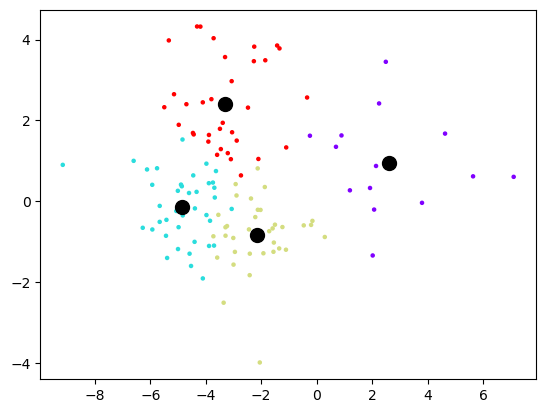

In [42]:
data_with_clusters = prot_df.copy()
plt.scatter(data_with_clusters["TP53"] ,data_with_clusters["A2M"], 
            s=5, c=identified_clusters, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black')
plt.show()

InvalidIndexError: (array([False, False, False, ..., False, False, False]), 0)